In [2]:
import pandas as pd
import numpy as np 

In [3]:
dataset = pd.read_csv("UberDataset.csv")

In [4]:
dataset.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [5]:
dataset['MILES'].skew()

33.817609504415614

In [97]:
from sklearn import preprocessing

In [98]:
label_encoder = preprocessing.LabelEncoder()

In [7]:
import matplotlib.pyplot as plt

{'whiskers': [<matplotlib.lines.Line2D at 0x7feaaddf3390>,
 'caps': [<matplotlib.lines.Line2D at 0x7feaade00e10>,
 'boxes': [<matplotlib.lines.Line2D at 0x7feaaddf2490>],
 'medians': [<matplotlib.lines.Line2D at 0x7feaade02610>],
 'fliers': [<matplotlib.lines.Line2D at 0x7feaade03150>],
 'means': []}

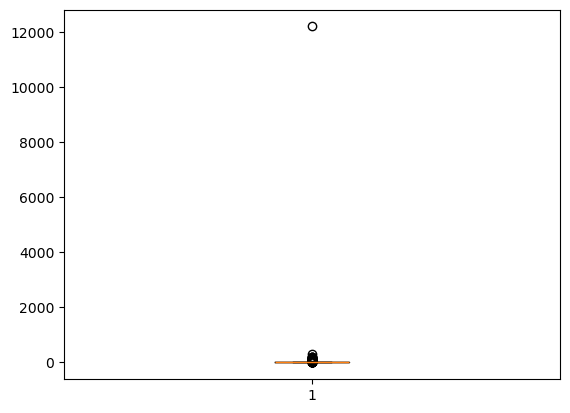

In [8]:
plt.boxplot(dataset['MILES'])

In [9]:
percentile25 = dataset['MILES'].quantile(0.25)

In [10]:
percentile25

2.9

In [11]:
percentile75 = dataset['MILES'].quantile(0.75)

In [12]:
iqr = percentile75 - percentile25

In [13]:
high = percentile75 + 1.5*iqr

In [14]:
high

21.65

In [15]:
low = percentile25 - 1.5*iqr

In [16]:
low

-8.35

In [17]:
dataset.isnull().sum()

START_DATE      0
END_DATE        1
CATEGORY        1
START           1
STOP            1
MILES           0
PURPOSE       503
dtype: int64

In [18]:
new_df = dataset.copy()

In [20]:
new_df['MILES'] = np.where(new_df['MILES']>high,high,np.where(new_df['MILES']<low,low,new_df['MILES']))

In [22]:
new_df['MILES'].skew()

1.009273852594551

In [23]:
new_df.to_csv('UberDataset-1.csv')

In [24]:
import seaborn as sns

{'whiskers': [<matplotlib.lines.Line2D at 0x7feaa98db650>,
 'caps': [<matplotlib.lines.Line2D at 0x7feaa98e1250>,
 'boxes': [<matplotlib.lines.Line2D at 0x7feaa98daad0>],
 'medians': [<matplotlib.lines.Line2D at 0x7feaa98e2950>],
 'fliers': [<matplotlib.lines.Line2D at 0x7feaa98e3490>],
 'means': []}

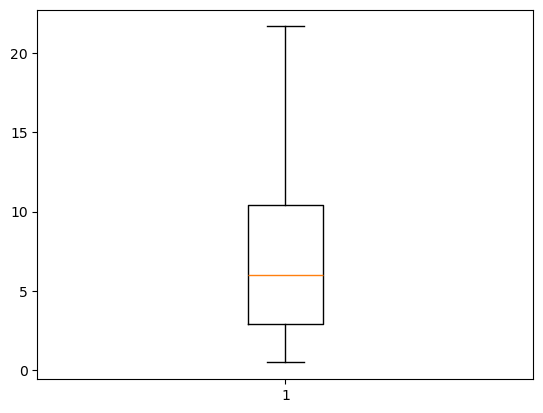

In [25]:
plt.boxplot(new_df['MILES'])